This will be a rather basic analysis of fatal car accidents in Australia from 1989 onwards. Overall as our cars and roads are becoming more modern and full of advanced technologies, we are much safer. On the other side the fact that more and more people drive a car doesn't help in improving the numbers.  In 1990 there were more than 10 million cars registered in Australia. Today? There were 20.1 million registered motor vehicles as at 31 January 2021.

Lets see what trends we can identify within this dataset.

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import numpy as np 
import pandas as pd

In [2]:
df = pd.read_csv('../input/australian-fatal-car-accident-data-19892021/Crash_Data.csv', low_memory=False)
df.head()

,Crash ID,State,Month,Year,Dayweek,Time,Crash Type,Bus Involvement,Heavy Rigid Truck Involvement,Articulated Truck Involvement,...,Age,National Remoteness Areas,SA4 Name 2016,National LGA Name 2017,National Road Type,Christmas Period,Easter Period,Age Group,Day of week,Time of day
0,20212133,Vic,9,2021,Sunday,0:30,Single,NaN,NaN,NaN,...,38,Inner Regional Australia,Melbourne - Outer East,Yarra Ranges (S),Arterial Road,No,No,26_to_39,Weekend,Night
1,20214022,SA,9,2021,Saturday,23:31,Multiple,No,No,No,...,28,Major Cities of Australia,Adelaide - North,Playford (C),NaN,No,No,26_to_39,Weekend,Night
2,20212096,Vic,9,2021,Saturday,23:00,Single,NaN,NaN,NaN,...,19,Inner Regional Australia,Hume,Wangaratta (RC),Access road,No,No,17_to_25,Weekend,Night
3,20212145,Vic,9,2021,Saturday,22:25,Single,NaN,NaN,NaN,...,23,Outer Regional Australia,Hume,Wangaratta (RC),Arterial Road,No,No,17_to_25,Weekend,Night
4,20212075,Vic,9,2021,Saturday,5:15,Single,NaN,NaN,NaN,...,46,Major Cities of Australia,Melbourne - South East,Casey (C),Local Road,No,No,40_to_64,Weekend,Night


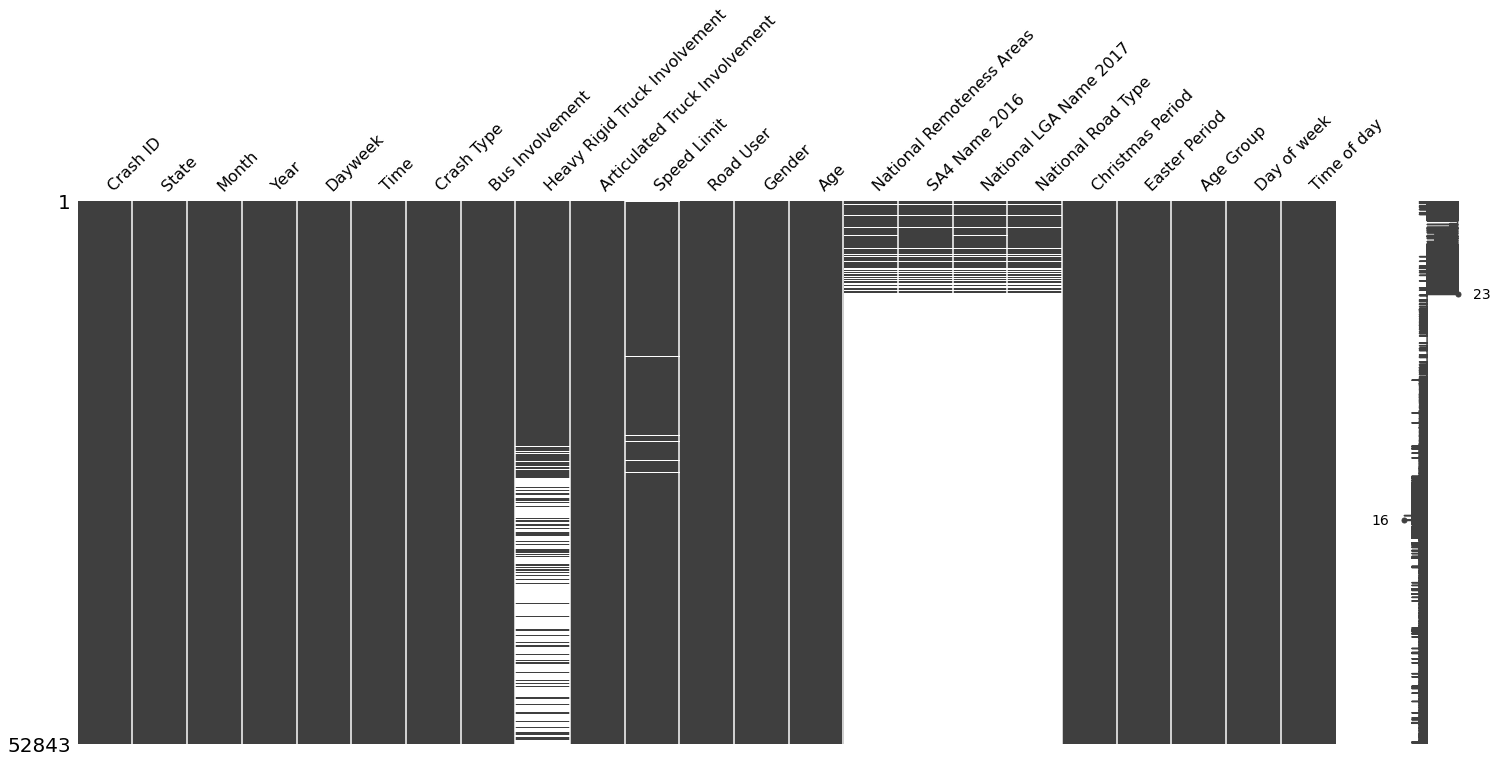

In [3]:
msno.matrix(df)
plt.show()

## Lets remove all the columns with more than 10% missing values:

In [4]:
df.columns

Index(['Crash ID', 'State', 'Month', 'Year', 'Dayweek', 'Time', 'Crash Type',
       'Bus Involvement', 'Heavy Rigid Truck Involvement',
       'Articulated Truck Involvement', 'Speed Limit', 'Road User', 'Gender',
       'Age', 'National Remoteness Areas', 'SA4 Name 2016',
       'National LGA Name 2017', 'National Road Type', 'Christmas Period',
       'Easter Period', 'Age Group', 'Day of week', 'Time of day'],
      dtype='object')

In [5]:
df = df.drop(columns=df.columns[df.isnull().sum() / len(df) > 0.1])

# General trend

In [6]:
def spines(ax,yl='share',xl='year'):
    x1 = ax.spines['right'].set_visible(False)
    x2 = ax.spines['top'].set_visible(False)
    x3 = ax.spines['left'].set_linewidth(2)
    x4 = ax.spines['bottom'].set_linewidth(2)
    x5 = ax.set_ylabel(yl)
    x6 = ax.set_xlabel(xl)
    return x1, x2, x3, x4, x5, x6

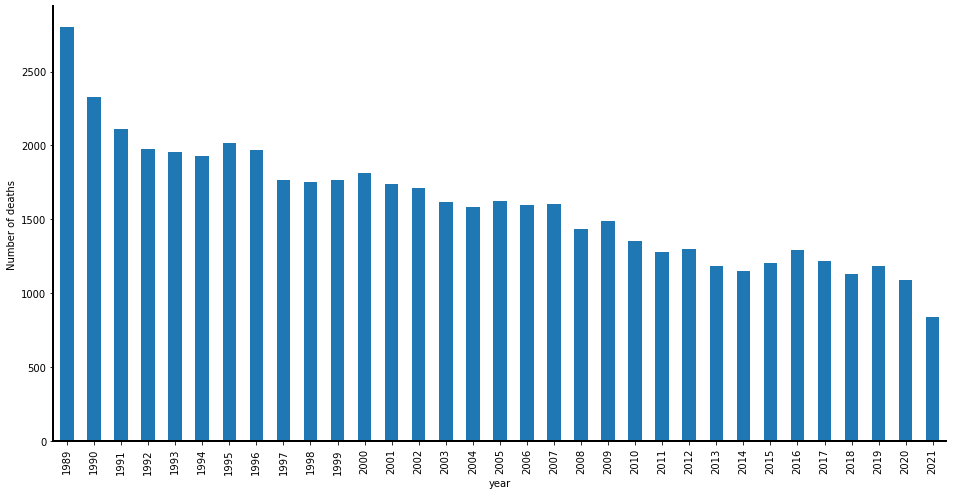

In [7]:
fig, ax = plt.subplots(figsize=(16,8))
df.groupby('Year')['Crash ID'].count().plot.bar()
spines(ax,yl='Number of deaths')
plt.show()

Roads are becoming safer, but is this trend equal to everyone on the roads? 

# Age group trends

In [8]:
df['Age Group'].value_counts()

17_to_25       13771
40_to_64       13415
26_to_39       12364
75_or_older     5110
0_to_16         4080
65_to_74        4013
Name: Age Group, dtype: int64

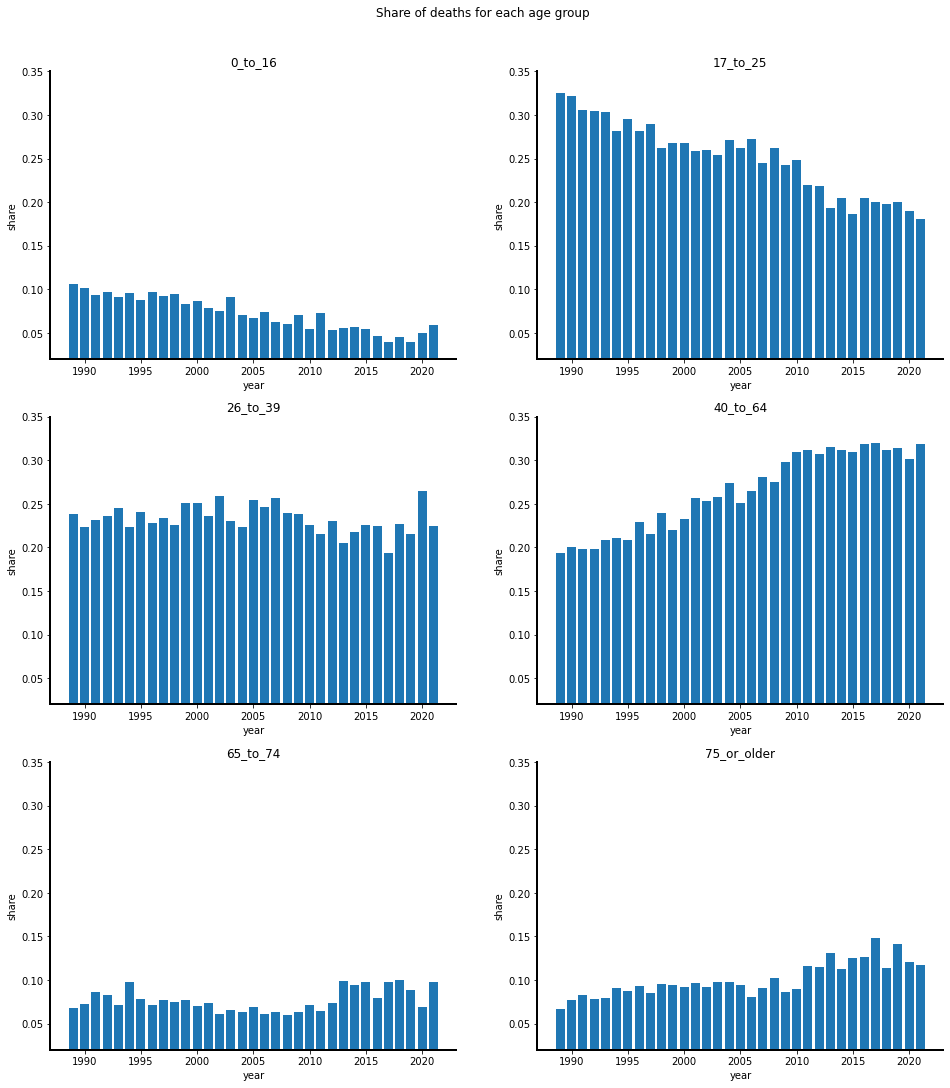

In [9]:
age_groups = df['Age Group'].value_counts().sort_index().index.tolist()

fig, ax = plt.subplots(figsize=(16,18))
fig.suptitle('Share of deaths for each age group', y=0.93)
n = 0 
for group in age_groups:
    n+=1
    for_plot = df[df['Age Group'] == group].groupby('Year')['Crash ID'].count() / df.groupby('Year')['Crash ID'].count()
    ax = plt.subplot(320+n)
    plt.bar(for_plot.index, for_plot.values)
    plt.title(group)
    plt.ylim(0.02,0.35)
    spines(ax)
plt.show()

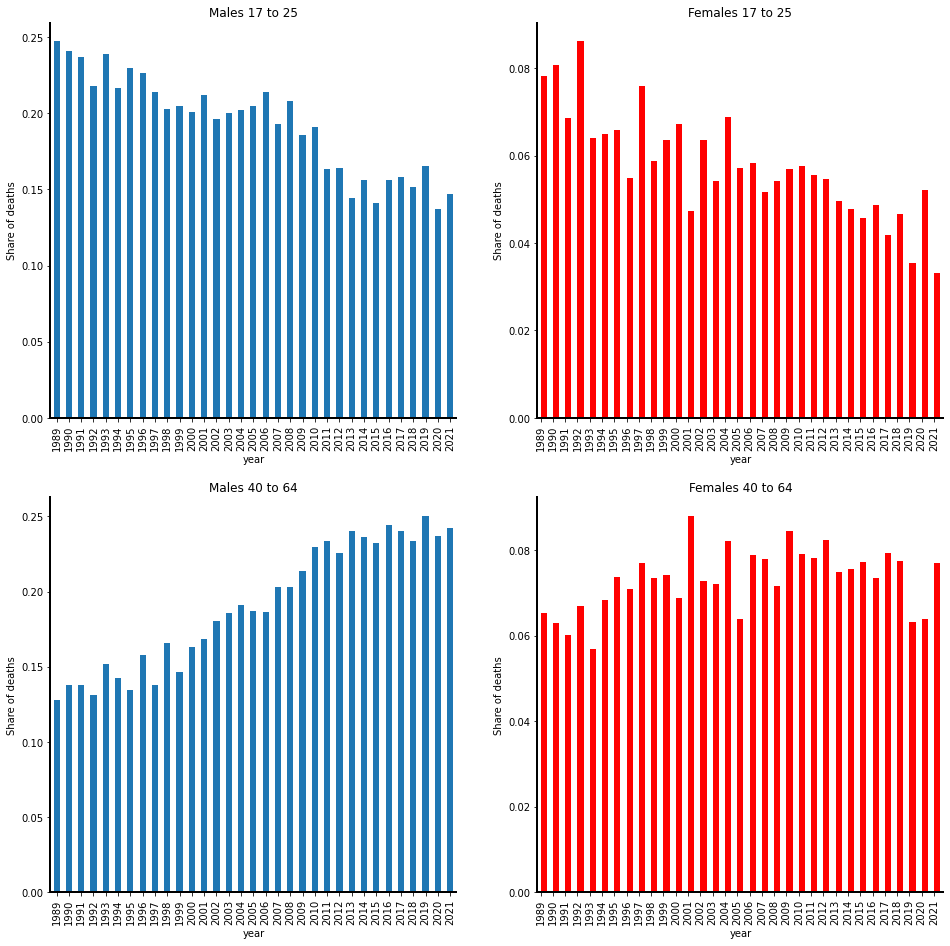

In [10]:
fig, ax = plt.subplots(figsize=(16,16))
ax = plt.subplot(221)
male_plot = df[(df['Gender']=='Male') & (df['Age Group']=='17_to_25') ].groupby('Year')['Crash ID'].count() / df.groupby('Year')['Crash ID'].count()
male_plot.plot.bar(title='Males 17 to 25')
spines(ax,yl='Share of deaths')
ax = plt.subplot(222)
female_plot = df[(df['Gender']=='Female') & (df['Age Group']=='17_to_25') ].groupby('Year')['Crash ID'].count() / df.groupby('Year')['Crash ID'].count()
female_plot.plot.bar( align='edge', color='r', title='Females 17 to 25')
spines(ax,yl='Share of deaths')

ax = plt.subplot(223)
male_plot = df[(df['Gender']=='Male') & (df['Age Group']=='40_to_64') ].groupby('Year')['Crash ID'].count() / df.groupby('Year')['Crash ID'].count()
male_plot.plot.bar(title='Males 40 to 64')
spines(ax,yl='Share of deaths')
ax = plt.subplot(224)
female_plot = df[(df['Gender']=='Female') & (df['Age Group']=='40_to_64') ].groupby('Year')['Crash ID'].count() / df.groupby('Year')['Crash ID'].count()
female_plot.plot.bar( align='edge', color='r', title='Females 40 to 64')
# plt.ylim(female_plot.min(), male_plot.max())
spines(ax,yl='Share of deaths')
plt.show()

**Observations:**

Big decrease in share of deaths among the age group with probably the worst reputation among road users (17 - 25 year olds, females registered a bigger drop).

At the same time, a significant increase in share of deaths among the group, which probably has the best reputation among road users (40 to 64 year olds - especially males have a huge increase).

# When should we travel?

Lets check how times of day and week affect the amount of death during the last 30 years.

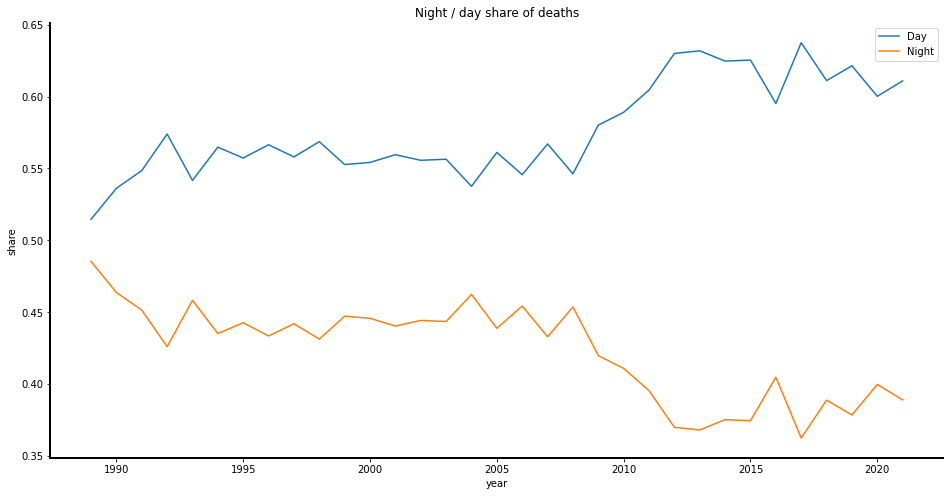

In [11]:
time_groups = df['Time of day'].value_counts().sort_index().index.tolist()

fig, ax = plt.subplots(figsize=(16,8))
n = 0 
for group in time_groups:
    n+=1
    for_plot = df[df['Time of day'] == group].groupby('Year')['Crash ID'].count() / df.groupby('Year')['Crash ID'].count()
    plt.plot(for_plot.index, for_plot.values, label=group)
    plt.title('Night / day share of deaths')

    plt.legend()
    spines(ax)
plt.show()

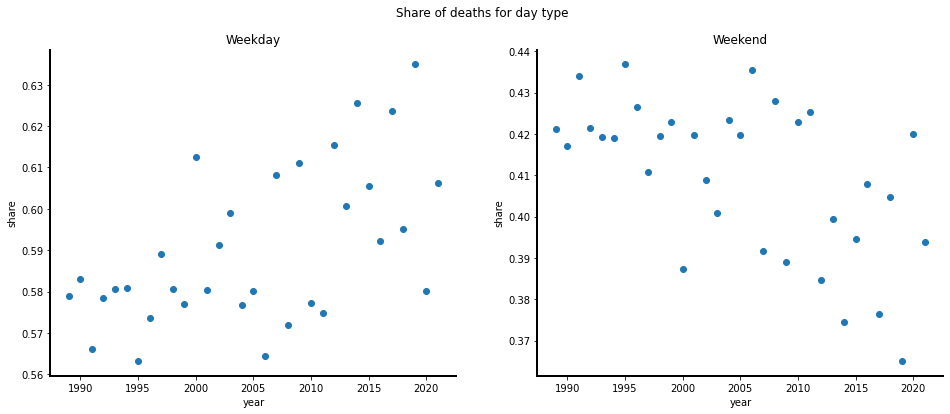

In [12]:
day_groups = df['Day of week'].value_counts().sort_index().index.tolist()

fig, ax = plt.subplots(figsize=(16,6))
fig.suptitle('Share of deaths for day type')
n = 0 
for group in day_groups:
    n+=1
    for_plot = df[df['Day of week'] == group].groupby('Year')['Crash ID'].count() / df.groupby('Year')['Crash ID'].count()
    ax = plt.subplot(120+n)
    plt.scatter(for_plot.index, for_plot.values)
    plt.title(group)
#     plt.ylim(0.02,0.35)
    spines(ax)
plt.show()

In [13]:
df['Time'] = pd.to_datetime(df['Time'])
df['Time'] = df['Time'].dt.strftime('%H')

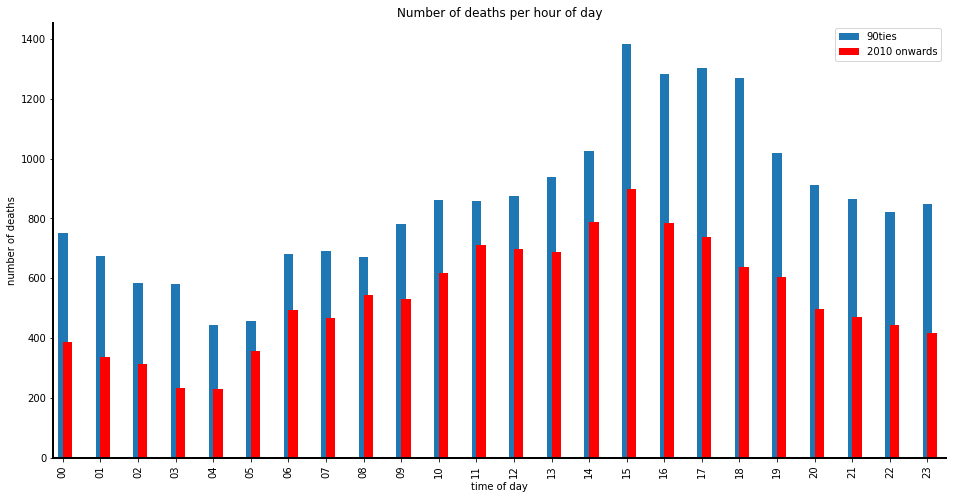

In [14]:
fig, ax = plt.subplots(figsize=(16,8))
df[df['Year'] < 1999].groupby('Time')['Crash ID'].count().plot.bar(label='90ties', align = 'center', width=0.25)
df[df['Year'] > 2010].groupby('Time')['Crash ID'].count().plot.bar(label='2010 onwards', align='edge', color='r', width=0.25)
plt.title('Number of deaths per hour of day')
plt.legend()
spines(ax, xl='time of day', yl='number of deaths')
plt.show()

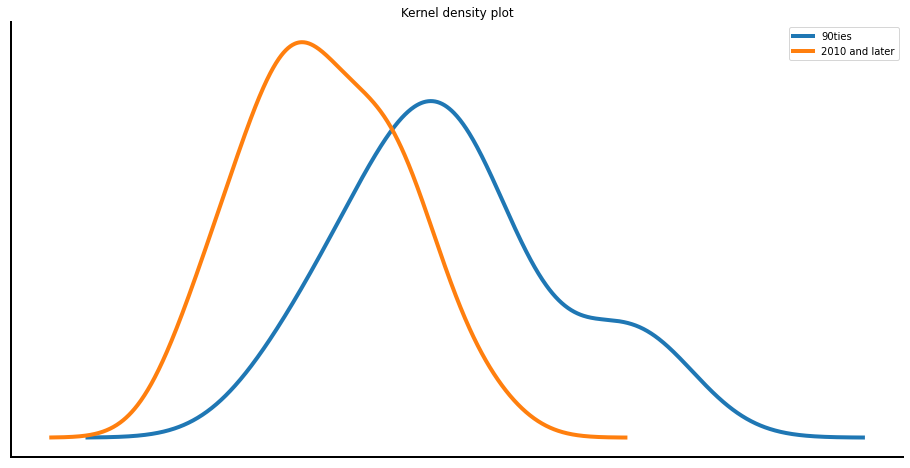

In [15]:
fig, ax = plt.subplots(figsize=(16,8))
df[df['Year'] < 2000].groupby('Time')['Crash ID'].count().plot.kde(label='90ties', linewidth=4)
df[df['Year'] >= 2010].groupby('Time')['Crash ID'].count().plot.kde(label='2010 and later', linewidth=4)
plt.legend()
ax.axes.xaxis.set_ticks([])
ax.axes.yaxis.set_ticks([])
spines(ax, xl='', yl='')
plt.title('Kernel density plot')
plt.show()

Road deaths are becoming more concentrated around a single time of the day in modern times.
* weekday, daytime around 3 o'clock has become a really dangerous time to be on the roads.
* on a positive side lets not forget it's still safer, than it used to be in the 90-ties

# Where is it safe?
Australia is no European Union, so within a range of few kilometers you can come across various speed limits (20, 30, 40(school zone), 50 or 60 (most urban areas), 80 (some roads), 90, 110, 130). We've got it all here! I've categorized them into only 4 types:
* up to 60
* up to 80
* up to 100
* up to 130

In [16]:
df = df[~df['Speed Limit'].isnull()]
df.loc[df['Speed Limit'] == '<40','Speed Limit'] = 40
df = df[~(df['Speed Limit'] == 'Unspecified')]
df['Speed Limit'] = df['Speed Limit'].astype(int)
df['Speed Limit group'] = np.digitize(df['Speed Limit'], bins=[60, 80,100, 140])
d = {3:'130',2:'100',1:'80', 0:'60'}
df = df.replace({'Speed Limit group': d})

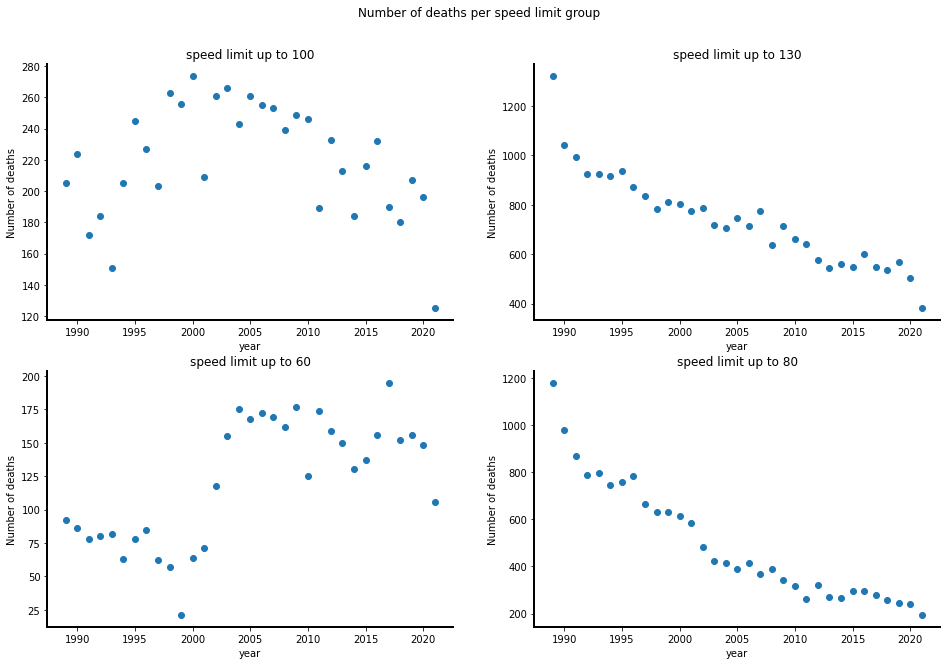

In [17]:
speed_groups = df['Speed Limit group'].value_counts().sort_index()[:6].index.tolist()

fig, ax = plt.subplots(figsize=(16,16))
fig.suptitle('Number of deaths per speed limit group', y=0.93)
n = 0 
for group in speed_groups:
    n+=1
    for_plot = df[df['Speed Limit group'] == group].groupby('Year')['Crash ID'].count() 
    ax = plt.subplot(320+n)
    plt.scatter(for_plot.index, for_plot.values)
    plt.title('speed limit up to '+group)
#     plt.ylim(0,0.55)
    spines(ax, yl='Number of deaths')
plt.show()


Clearly as the cities grow, their traffic increases and an increase in numnber of deaths on the roads follows.

# Which state is the safest one?

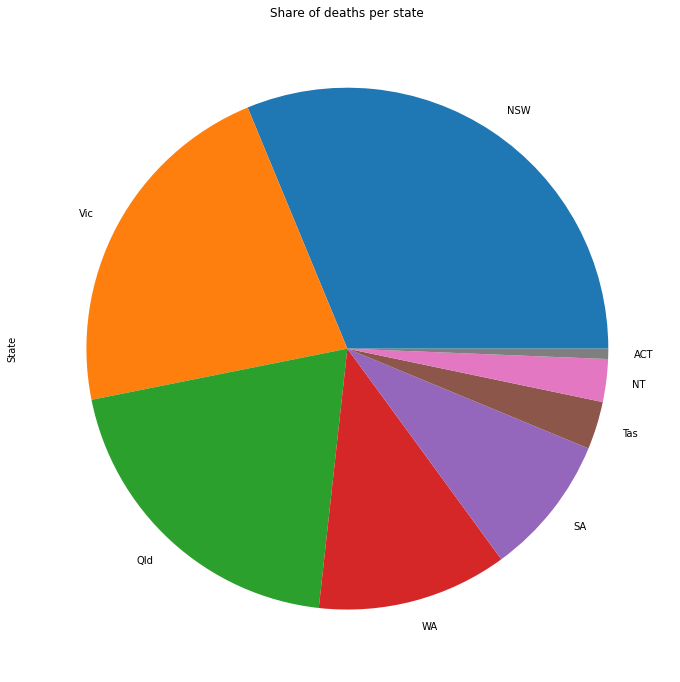

In [18]:
fig, ax = plt.subplots(figsize=(16,12))
df['State'].value_counts().plot.pie()
plt.title('Share of deaths per state')
plt.show()

We're going to analyze the top 4 states:
* New South Wales
* Victoria
* Queensland
* Western Australia

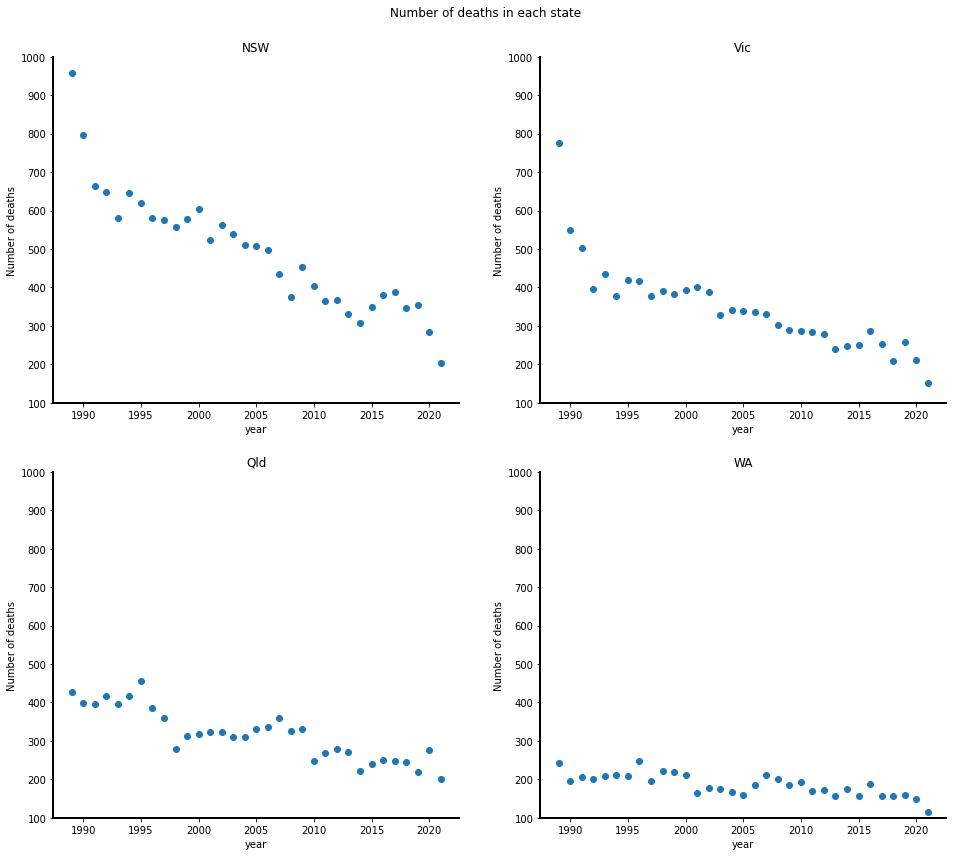

In [19]:
locations = df['State'].value_counts().sort_values(ascending=False)[:4].index.tolist()

fig, ax = plt.subplots(figsize=(16,14))
fig.suptitle('Number of deaths in each state', y=0.93)
n = 0 
for group in locations:
    n+=1
    for_plot = df[df['State'] == group].groupby('Year')['Crash ID'].count() 
    ax = plt.subplot(220+n)
    plt.scatter(for_plot.index, for_plot.values)
    plt.title(group)
    plt.ylim(100,1000)
    spines(ax, yl='Number of deaths')
plt.show()


The two biggest states recorded biggest proportional drops in number of deaths.

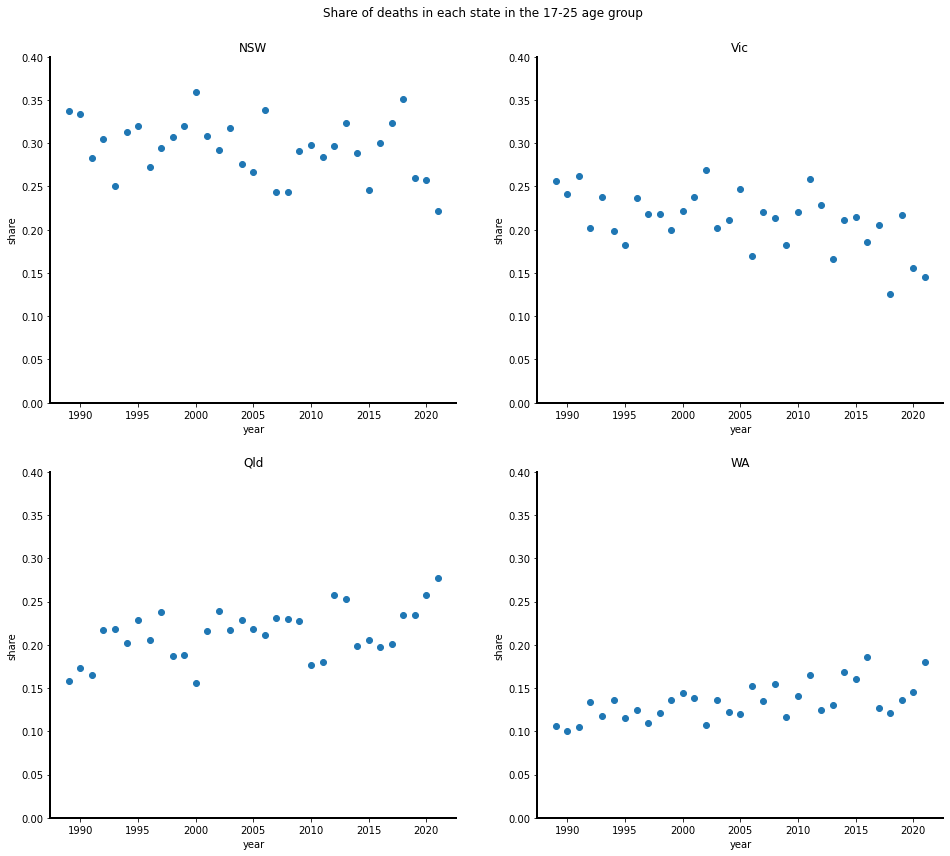

In [20]:
locations = df.loc[df['Age Group']=='17_to_25', 'State'].value_counts().sort_values(ascending=False).index[:4].tolist()

fig, ax = plt.subplots(figsize=(16,14))
fig.suptitle('Share of deaths in each state in the 17-25 age group', y=0.93)
n = 0 
for group in locations:
    n+=1
    for_plot = df[(df['Age Group']=='17_to_25')&(df['State'] == group)].groupby('Year')['Crash ID'].count() / df[df['Age Group']=='17_to_25'].groupby('Year')['Crash ID'].count()
    ax = plt.subplot(220+n)
    plt.scatter(for_plot.index, for_plot.values)
    plt.title(group)
    plt.ylim(0,0.4)
    spines(ax)
plt.show()


Two biggest states are driving down the death share numbers for the age group 17 to 25, but there's an opposite trend in Queensland and WA, their share of road deaths is increasing in those states.

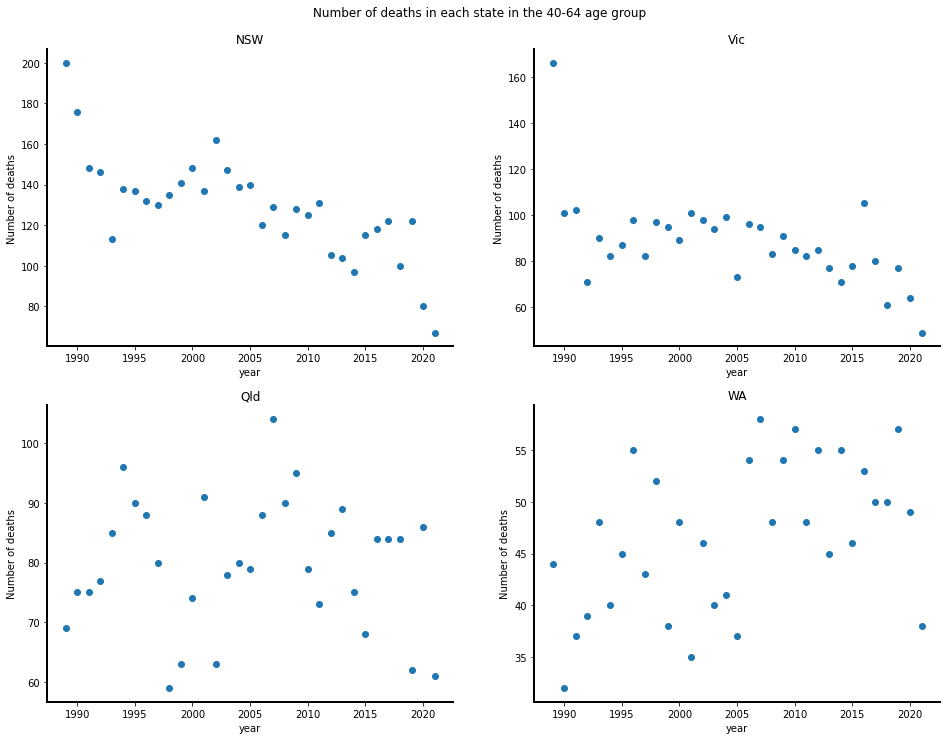

In [21]:
locations = df.loc[df['Age Group']=='40_to_64', 'State'].value_counts().sort_values(ascending=False).index[:4].tolist()

fig, ax = plt.subplots(figsize=(16,12))
fig.suptitle('Number of deaths in each state in the 40-64 age group', y=0.93)

n = 0 
for group in locations:
    n+=1
    for_plot = df[(df['Age Group']=='40_to_64')&(df['State'] == group)].groupby('Year')['Crash ID'].count() 
    ax = plt.subplot(220+n)
    plt.scatter(for_plot.index, for_plot.values)
    plt.title(group)
#     plt.ylim(0,0.6)
    spines(ax, yl='Number of deaths')
plt.show()


Knowing that males aged 40 - 64 are dying more frequently on the roads, and looking at the above plot of number of deaths in WA. Lets see if we isolate that group, we'll see even steeper increase in their share of deaths on the roads:

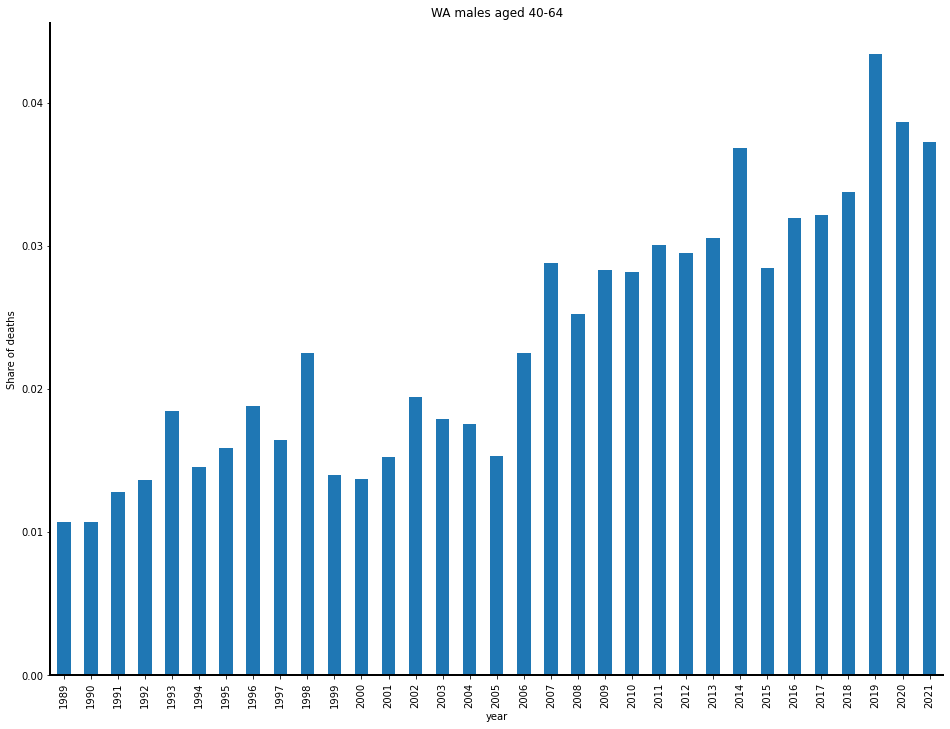

In [22]:
fig, ax = plt.subplots(figsize=(16,12))
male_plot = df[(df['Gender']=='Male') & (df['Age Group']=='40_to_64')  & (df['State']=='WA')].groupby('Year')['Crash ID'].count() / df.groupby('Year')['Crash ID'].count()
male_plot.plot.bar(title='WA males aged 40-64')
spines(ax,yl='Share of deaths')
plt.show()

## That is the group that we should be addressing, their share of road deaths quadrupled in the last 30 years.

# Road users

In [23]:
df['Road User'].value_counts()

Driver                          23535
Passenger                       12064
Pedestrian                       8133
Motorcycle rider                 6569
Pedal cyclist                    1405
Motorcycle pillion passenger      360
Other/-9                           73
Name: Road User, dtype: int64

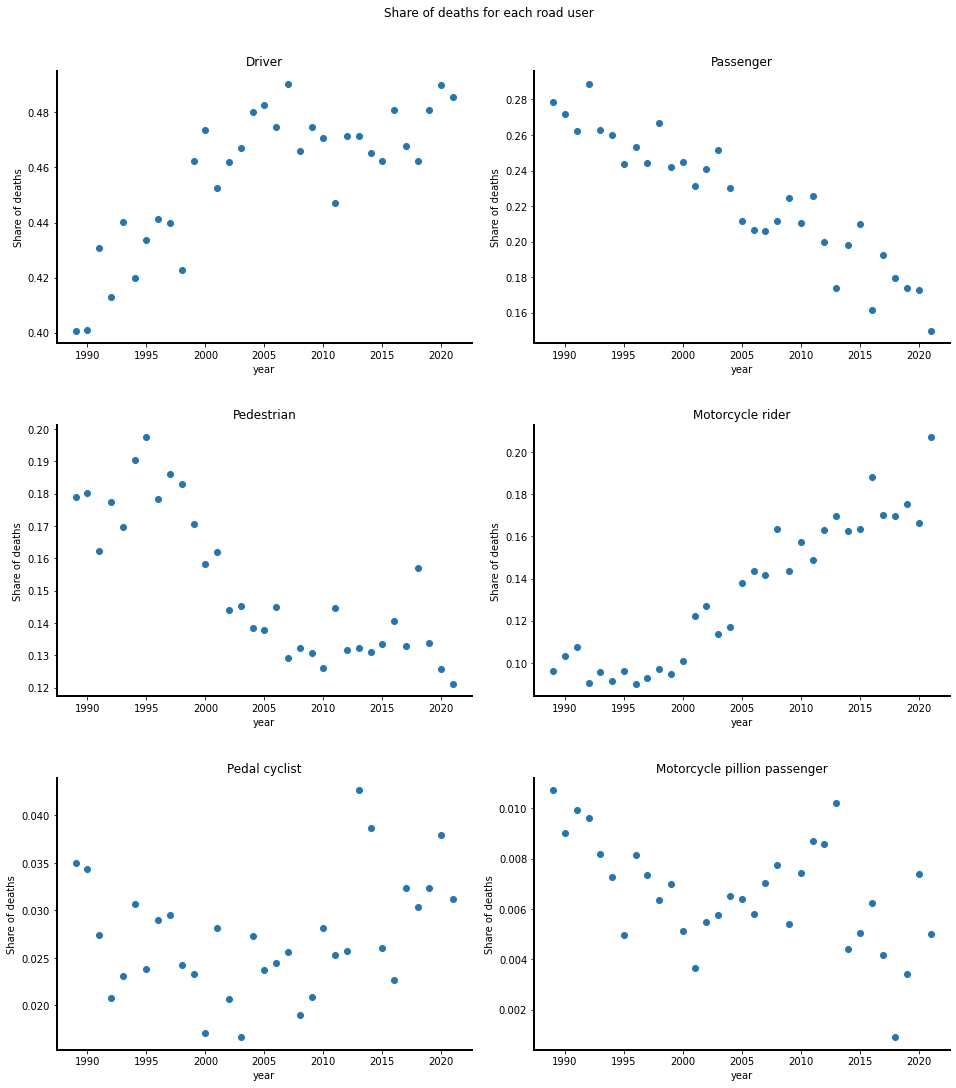

In [24]:
df = df[~(df['Road User'] == 'Other/-9')]
users = df['Road User'].value_counts().sort_values(ascending=False).index.tolist()

fig, ax = plt.subplots(figsize=(16,18))
fig.suptitle('Share of deaths for each road user', y=0.93)
fig.subplots_adjust(hspace=0.3, wspace=0.15)
n = 0 
for group in users:
    n+=1
    for_plot = df[df['Road User'] == group].groupby('Year')['Crash ID'].count()  / df.groupby('Year')['Crash ID'].count()
    ax = plt.subplot(320+n)
    plt.scatter(for_plot.index, for_plot.values)
    plt.title(group)
#     plt.ylim(0.0,0.39)
    spines(ax, yl='Share of deaths')
plt.show()


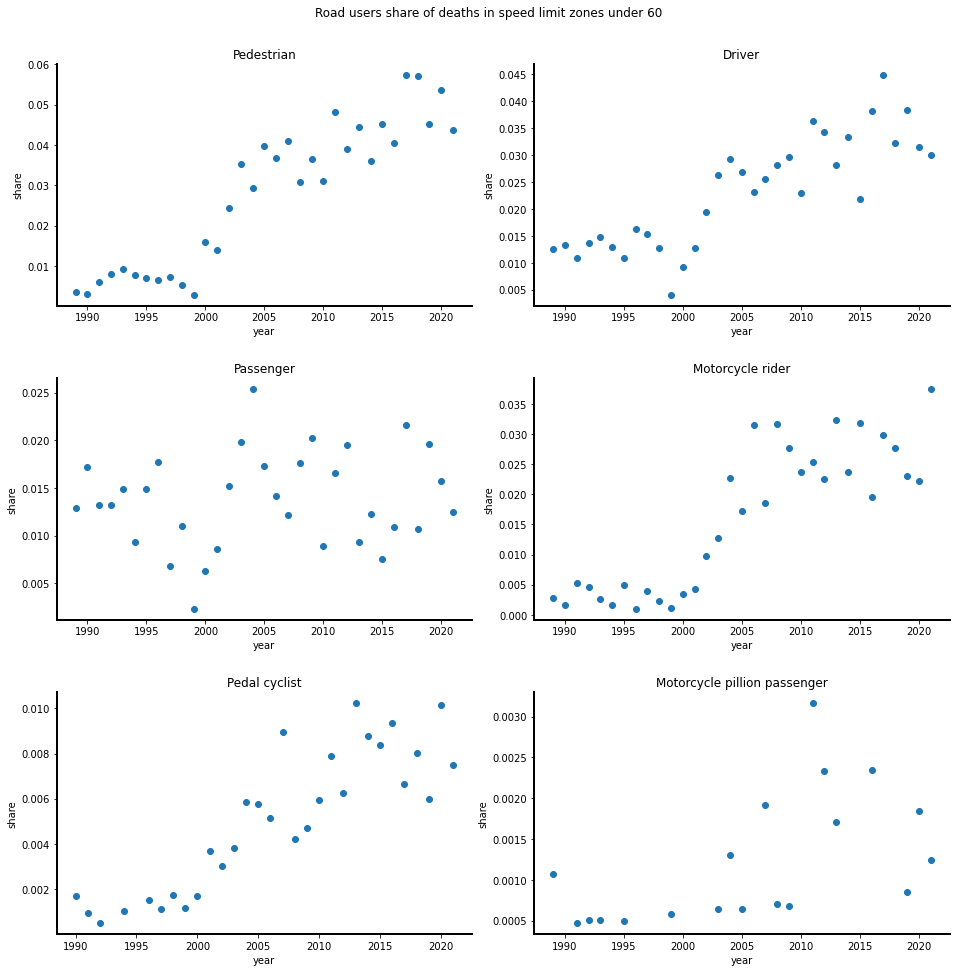

In [25]:
speeds = df.loc[df['Speed Limit group']=='60', 'Road User'].value_counts().sort_values(ascending=False).index.tolist()

fig, ax = plt.subplots(figsize=(16,16))
fig.subplots_adjust(hspace=0.3, wspace=0.15)
fig.suptitle('Road users share of deaths in speed limit zones under 60', y=0.93)
n = 0 
for group in speeds:
    n+=1
    for_plot = df[(df['Speed Limit group']=='60')&(df['Road User'] == group)].groupby('Year')['Crash ID'].count() / df.groupby('Year')['Crash ID'].count()
    ax = plt.subplot(320+n)
    plt.scatter(for_plot.index, for_plot.values)
    plt.title(group)
#     plt.ylim(0,0.6)
    spines(ax)
plt.show()


# Conclusions:
Although the general number of deaths is decreasing, we can still isolate some areas and groups that should get attention, lets name a few:
* males aged 40 to 64 - their share of road deaths is increasing, especially in WA
* young people in Queensland
* urban areas are becoming more deadly
* both WA and QLD death numbers are decreasing much slower than NSW and VIC
